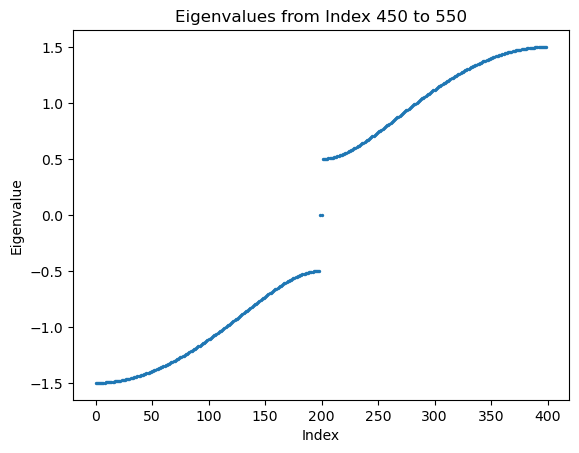

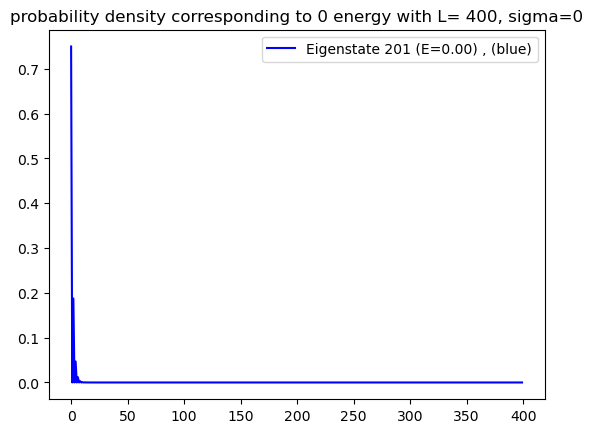

C:\Users\lenovo\AppData\Local\Temp\ipykernel_62248\2044259152.py:115: ComplexWarning: Casting complex values to real discards the imaginary part
  v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]


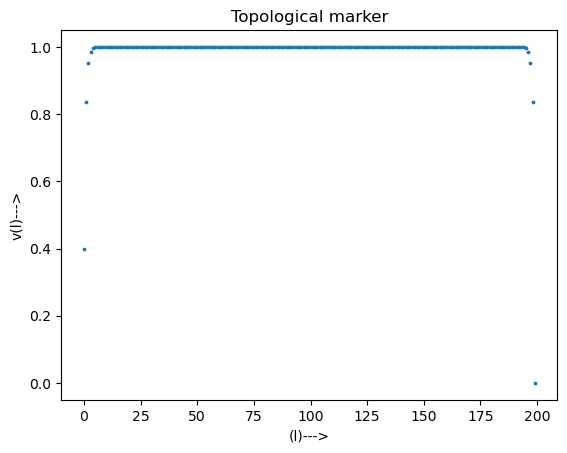

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
L= 400
t=0.75 #hopping amplitude
dt=-0.25
sigma=0#wrapping of space-time
w=t-dt
v=t+dt
SHH = np.zeros((L,L),dtype=complex )

for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SHH[i+1,i]=v_i
              SHH[i,i+1]=v_i
            if i % 2 != 0:
             SHH[i+1,i]=w_i
             SHH[i,i+1]=w_i
#SHH[L-1,0]=w
#SHH[0,L-1]=w
#print(SHH)

eigenvalues, eigenvectors = np.linalg.eigh(SHH)
plt.scatter(np.arange(len(eigenvalues)), eigenvalues,s=2)  
#print(eigenvalues[397],eigenvalues[398],eigenvalues[399],eigenvalues[400],eigenvalues[401],eigenvalues[402], eigenvalues[403])
#print(eigenvalues[501]-eigenvalues[498])

#-----------------------------------------------------------------------------------

# # Filter the eigenvalues and corresponding x-range (indices) to plot only for x = 450 to 550
# x_range = np.arange(450, 550)  # x indices from 450 to 550
# filtered_eigenvalues = eigenvalues[450:550]

# Plot the filtered data
# plt.scatter(x_range, filtered_eigenvalues, s=2)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues from Index 450 to 550')
plt.show()

#--------------------------------------------------------------------------------------------------

eigenvalues, eigenvectors = np.linalg.eigh(SHH)

probability_density = np.abs(eigenvectors[:, L//2])**2 #------------------------------------------------------
plt.figure() 
plt.title(f'probability density corresponding to 0 energy with L= {L}, sigma={sigma}')

#plt.plot(np.arange(len(eigenvalues)), probability_density)
mid=L//2
plt.plot(np.abs(eigenvectors[:, mid])**2, label=f'Eigenstate {mid+1} (E={eigenvalues[mid]:.2f}) , (blue)', color='blue')
#t.plot(np.abs(eigenvectors[:, mid-1])**2, label=f'Eigenstate {i} (E={eigenvalues[i-1]:.2f}), (yellow)', color='yellow')
#plt.yscale('log')
plt.legend()
plt.show()






#------------------------------------------------------------------------------------------------------------




# Number of eigenvectors
num_eigenvectors = len(eigenvalues)

# Number of eigenvectors to include in each matrix (half in each case)
num_eigenvectors_half = num_eigenvectors // 2

# matrix from the first half of the eigenvectors
Um= np.column_stack(eigenvectors[:, :num_eigenvectors_half])

# matrix from the remaining half of the eigenvectors
Up= np.column_stack(eigenvectors[:, num_eigenvectors_half:])

trans_Um = np.transpose(Um)
trans_Up= np.transpose(Up)

Pp= trans_Up@Up
Pm=trans_Um@Um
Q=Pp-Pm
GA=np.zeros((L,L))
GB=np.zeros((L,L))
for i in range(len(eigenvalues)):
    if i % 2 == 0:
      GA[i,i]=1
for i in range(len(eigenvalues)):
    if i % 2 != 0:
      GB[i,i]=1

Qab= GA@Q@GB
Qba= GB@Q@GA
l=np.arange(-abs(L/4), abs(L/4) , 1 )
X= np.zeros((L,L))
X[0,0]=-L/4
for i in range(len(eigenvalues)):
        if i % 2 == 0:
         X[i,i]=-L/4+i/2
         X[i+1,i+1]=X[i,i]
#print(np.shape(GA))
#print(X)

v1=1/2*(Qba@(X@Qab-Qab@X))
v2=1/2*(Qab@(Qba@X-X@Qba))
#print(v1)
#--------------------------------------------
v=np.zeros(int(L/2))
#--------------------------------------- 
for i in range(int(L/2)-1):
    v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]
#print(v)
plt.figure()
plt.title("Topological marker")
plt.xlabel("(l)--->")
plt.ylabel("v(l)--->")
plt.scatter(np.arange(len(v)),v,s=3)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]
(400, 400)


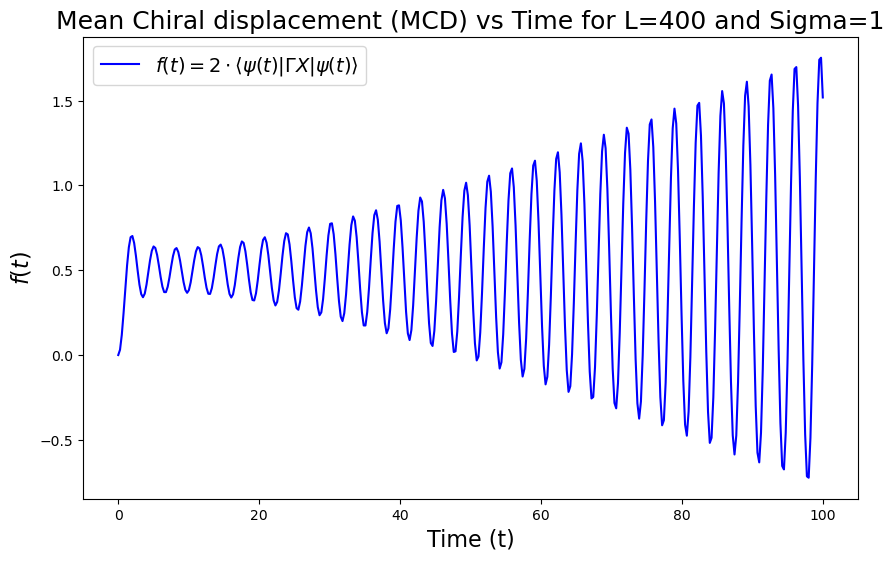

Average MCD: 0.5025253576640961
Fluctuation of MCD: 0.2386994603591908


In [ ]:
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt


L= 400
t=1 #hopping amplitude
dt=0
sigma=1  #warpping of space-time
w=t-dt
v=t+dt
SHH = np.zeros((L,L),dtype=complex )

for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SHH[i+1,i]=v_i
              SHH[i,i+1]=v_i
            if i % 2 != 0:
             SHH[i+1,i]=w_i
             SHH[i,i+1]=w_i

eigenvalues, eigenvectors = np.linalg.eigh(SHH)

GA=np.zeros((L,L))
GB=np.zeros((L,L))
for i in range(len(eigenvalues)):
    if i % 2 == 0:
      GA[i,i]=1
for i in range(len(eigenvalues)):
    if i % 2 != 0:
      GB[i,i]=1


l=np.arange(-abs(L/4), abs(L/4) , 1 )
X= np.zeros((L,L))
X[0,0]=-L/4
for i in range(len(eigenvalues)):
        if i % 2 == 0:
         X[i,i]=-L/4+i/2
         X[i+1,i+1]=X[i,i]
G= GA-GB
print(G)
mid_matrix= G@X
print(X.shape)



# Function to calculate time evolution
def time_evolution(H, psi, t):
    """
    Calculate the time-evolved state |psi(t)> = exp(-iHt) |psi>
    """
    # Calculate the unitary evolution operator U = exp(-iHt)
    U = expm(-1j * H * t)
    # Evolve the state |psi>
    psi_t = np.dot(U, psi)
    return psi_t


eigenvalues, eigenvectors = np.linalg.eigh(SHH)

probability_density = np.abs(eigenvectors[:, L//2])**2 #------------------------------------------------------
# plt.figure() 
# plt.title(f'probability density corresponding to 0 energy with L= {L}, sigma={sigma}')

#plt.plot(np.arange(len(eigenvalues)), probability_density)
mid=L//2
# plt.plot(np.abs(eigenvectors[:, mid])**2, label=f'Eigenstate {mid+1} (E={eigenvalues[mid]:.2f}) , (blue)', color='blue')
# #t.plot(np.abs(eigenvectors[:, mid-1])**2, label=f'Eigenstate {i} (E={eigenvalues[i-1]:.2f}), (yellow)', color='yellow')
# #plt.yscale('log')
# plt.legend()
# plt.show()


# Input: Define the Hamiltonian H, initial state |psi>, and time t
H = SHH    #Hamiltonian
#---------------------------
#initinal state
# def initial_matrix(N):
#     """
#     Creates an N x 1 matrix with all entries 0 except the N/2 entry (1-based index).
#     """
#     if N % 2 != 0:
#         raise ValueError("N must be even for N/2 to be an integer.")
    
#     matrix = np.zeros((N, 1))  # Create an N x 1 matrix filled with zeros
#     matrix[N // 2 - 1, 0] = 1  # Set the N/2-th entry (1-based index) to 1
#     return matrix


def initial_matrix(N):
    """
    Create a 1D array of length N with all elements 0 except the middle element, which is 1.
    """
    if N <= 0:
        raise ValueError("N must be a positive integer.")
    
    array = np.zeros(N)  # Create a 1D array of length N with all zeros
    middle_index = N // 2  # Calculate the middle index (integer division)
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Example usage
N = L  # Length of the array
psi = initial_matrix(N)


#-----------------------------------------------------------------------------------
 
#psi = initial_matrix(N)
#psi= eigenvectors[:,mid]



#---------------------------

#--------------------------------------------------------------------------------------------------------------

time_range = np.linspace(0, L/4, L)  # Time values from 0 to 200

# Calculate f(t) = 2 * <psi(t)|psi(t)> for each time step
f_values = []
for t in time_range:
    psi_t = time_evolution(H, psi, t)       # |psi(t)>
    bra_psi_t = np.conjugate(psi_t.T)       # <psi(t)|
    f_t = 2 * (bra_psi_t @mid_matrix@ psi_t)     # 2 * <psi(t)|psi(t)>
    f_values.append(f_t.real)              # Take the real part of f(t)

# Plotting f(t) against time
plt.figure(figsize=(10, 6))
plt.plot(time_range, f_values, label=r'$f(t) = 2 \cdot \langle \psi(t) |\Gamma X| \psi(t) \rangle$', color='blue')
plt.xlabel('Time (t)', fontsize=16)
plt.ylabel(r'$f(t)$', fontsize=16)
plt.title(f'Mean Chiral displacement (MCD) vs Time for L={L} and Sigma={sigma}',fontsize=18)
plt.legend(fontsize=14)
#plt.grid(True)
plt.show()



#-----------------------------------------------------------------------------------------------------------------

average = sum(f_values) / len(f_values)
fluctuation= np.var(f_values)
print("Average MCD:", average)
print("Fluctuation of MCD:", fluctuation)





# # Print results
# print("Time-evolved state |psi(t)>:", psi_t)
# print("Bra of the state <psi(t)|:", bra_psi_t)


In [14]:
import numpy as np
from scipy.linalg import expm

# Function to calculate time evolution
def time_evolution(H, psi, t):
    """
    Calculate the time-evolved state |psi(t)> = exp(-iHt) |psi>
    """
    # Calculate the unitary evolution operator U = exp(-iHt)
    U = expm(-1j * H * t)
    # Evolve the state |psi>
    psi_t = np.dot(U, psi)
    return psi_t

# Input: Define the Hamiltonian H, initial state |psi>, and time t
H = np.array([[1, 0], [0, 2]])  # Example 2x2 Hamiltonian
psi = np.array([1, 0])          # Example initial state |psi> in vector form
t = 1.0                         # Time

# Calculate |psi(t)>
psi_t = time_evolution(H, psi, t)

# Calculate the bra <psi(t)| as the conjugate transpose
bra_psi_t = np.conjugate(psi_t.T)

# Print results
print("Time-evolved state |psi(t)>:", psi_t)
print("Bra of the state <psi(t)|:", bra_psi_t)


Time-evolved state |psi(t)>: [0.54030231-0.84147098j 0.        +0.j        ]
Bra of the state <psi(t)|: [0.54030231+0.84147098j 0.        -0.j        ]


In [52]:
G= GA-GB
#print(X)
mid_matrix= G@X
#print(eigenvectors[:,mid])
average = sum(f_values) / len(f_values)
print("Average MCD:", average)


Average MCD: 0.9941125346112303


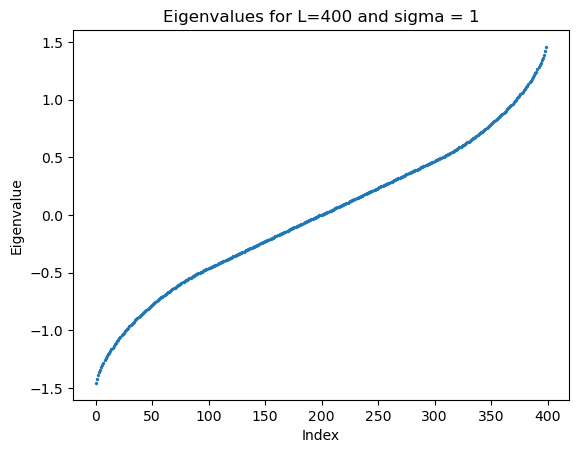

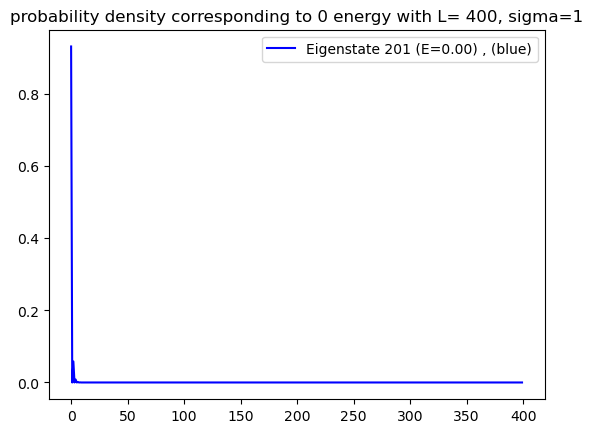

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
L= 400
t=0.75 #hopping amplitude
dt=-0.25
sigma=1     #warpping of space-time
w=t-dt
v=t+dt
SHH = np.zeros((L,L),dtype=complex )

for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SHH[i+1,i]=v_i
              SHH[i,i+1]=v_i
            if i % 2 != 0:
             SHH[i+1,i]=w_i
             SHH[i,i+1]=w_i


eigenvalues, eigenvectors = np.linalg.eigh(SHH)
plt.scatter(np.arange(len(eigenvalues)), eigenvalues,s=2)  
#print(eigenvalues[397],eigenvalues[398],eigenvalues[399],eigenvalues[400],eigenvalues[401],eigenvalues[402], eigenvalues[403])
#print(eigenvalues[501]-eigenvalues[498])

#-----------------------------------------------------------------------------------

# # Filter the eigenvalues and corresponding x-range (indices) to plot only for x = 450 to 550
# x_range = np.arange(450, 550)  # x indices from 450 to 550
# filtered_eigenvalues = eigenvalues[450:550]

# Plot the filtered data
# plt.scatter(x_range, filtered_eigenvalues, s=2)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues for L={L} and sigma = {sigma}')
plt.show()

#--------------------------------------------------------------------------------------------------

eigenvalues, eigenvectors = np.linalg.eigh(SHH)

probability_density = np.abs(eigenvectors[:, L//2])**2 #------------------------------------------------------
plt.figure() 
plt.title(f'probability density corresponding to 0 energy with L= {L}, sigma={sigma}')

#plt.plot(np.arange(len(eigenvalues)), probability_density)
mid=L//2
plt.plot(np.abs(eigenvectors[:, mid])**2, label=f'Eigenstate {mid+1} (E={eigenvalues[mid]:.2f}) , (blue)', color='blue')
#t.plot(np.abs(eigenvectors[:, mid-1])**2, label=f'Eigenstate {i} (E={eigenvalues[i-1]:.2f}), (yellow)', color='yellow')
#plt.yscale('log')
plt.legend()
plt.show()

for i in range (L//2)

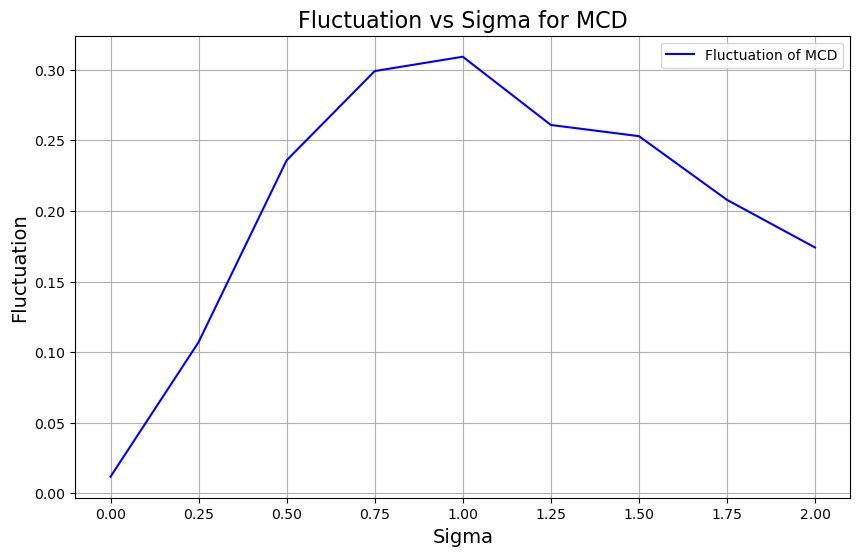

Sigma: 0.0, Fluctuation: 0.011778172789441843
Sigma: 0.25, Fluctuation: 0.10705804100121481
Sigma: 0.5, Fluctuation: 0.23585571592722232
Sigma: 0.75, Fluctuation: 0.29905017597850375
Sigma: 1.0, Fluctuation: 0.309216281933211
Sigma: 1.25, Fluctuation: 0.26088971790670656
Sigma: 1.5, Fluctuation: 0.2529631199625513
Sigma: 1.75, Fluctuation: 0.20785547485506786
Sigma: 2.0, Fluctuation: 0.17409650034768503


In [10]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L = 400  # Length
t = 0.75  # hopping amplitude
dt = -0.25
sigma_values = np.arange(0, 2.25, 0.25)  # Range for sigma from 0 to 2 with interval 0.25
time_range = np.linspace(0, L / 3, L)  # Time values

# Prepare the plot
plt.figure(figsize=(10, 6))

# Loop over sigma values
fluctuations = []  # List to store fluctuation values for each sigma
for sigma in sigma_values:
    # Initialize Hamiltonian (SHH) based on the current sigma value
    w = t - dt
    v = t + dt
    SHH = np.zeros((L, L), dtype=complex)
    
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1)) ** sigma
        w_i = w * ((i + 1) / (L - 1)) ** sigma
        if i % 2 == 0:
            SHH[i + 1, i] = v_i
            SHH[i, i + 1] = v_i
        if i % 2 != 0:
            SHH[i + 1, i] = w_i
            SHH[i, i + 1] = w_i
    
    # Compute eigenvalues and eigenvectors of SHH
    eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    
    # Initialize matrices GA, GB for time evolution
    GA = np.zeros((L, L))
    GB = np.zeros((L, L))
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            GA[i, i] = 1
    for i in range(len(eigenvalues)):
        if i % 2 != 0:
            GB[i, i] = 1

    G = GA - GB
    X = np.zeros((L, L))
    X[0, 0] = -L / 4
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            X[i, i] = -L / 4 + i / 2
            X[i + 1, i + 1] = X[i, i]

    mid_matrix = G @ X

    # Compute initial state |psi>
    psi = initial_matrix(L)

    # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
    f_values = []
    for t_val in time_range:
        psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
        bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
        f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
        f_values.append(f_t.real)  # Take the real part of f(t)
    
    # Calculate fluctuation (variance of f_values)
    fluctuation = np.var(f_values)
    fluctuations.append(fluctuation)

# Plot fluctuation vs sigma
plt.plot(sigma_values, fluctuations, label='Fluctuation of MCD', color='blue')
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Fluctuation', fontsize=14)
plt.title('Fluctuation vs Sigma for MCD', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Print fluctuation values for each sigma
for sigma, fluct in zip(sigma_values, fluctuations):
    print(f'Sigma: {sigma}, Fluctuation: {fluct}')


In [ ]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L = 200  # Length
t = 0.75  # hopping amplitude
dt = -0.25
sigma_values = np.arange(0, 2.1, 0.1)  # Range for sigma from 0 to 2 with interval 0.25
time_range = np.linspace(0, L / 3, L)  # Time values

# Prepare the plot
plt.figure(figsize=(10, 6))

# Loop over sigma values
fluctuations = []  # List to store fluctuation values for each sigma
for sigma in sigma_values:
    # Initialize Hamiltonian (SHH) based on the current sigma value
    w = t - dt
    v = t + dt
    SHH = np.zeros((L, L), dtype=complex)
    
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1)) ** sigma
        w_i = w * ((i + 1) / (L - 1)) ** sigma
        if i % 2 == 0:
            SHH[i + 1, i] = v_i
            SHH[i, i + 1] = v_i
        if i % 2 != 0:
            SHH[i + 1, i] = w_i
            SHH[i, i + 1] = w_i
    
    # Compute eigenvalues and eigenvectors of SHH
    eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    
    # Initialize matrices GA, GB for time evolution
    GA = np.zeros((L, L))
    GB = np.zeros((L, L))
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            GA[i, i] = 1
    for i in range(len(eigenvalues)):
        if i % 2 != 0:
            GB[i, i] = 1

    G = GA - GB
    X = np.zeros((L, L))
    X[0, 0] = -L / 4
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            X[i, i] = -L / 4 + i / 2
            X[i + 1, i + 1] = X[i, i]

    mid_matrix = G @ X

    # Compute initial state |psi>
    psi = initial_matrix(L)

    # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
    f_values = []
    for t_val in time_range:
        psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
        bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
        f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
        f_values.append(f_t.real)  # Take the real part of f(t)
    
    # Calculate fluctuation (variance of f_values)
    fluctuation = np.var(f_values)
    fluctuations.append(fluctuation)

# Plot fluctuation vs sigma
plt.plot(sigma_values, fluctuations, label='Fluctuation of MCD', color='blue')
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Fluctuation', fontsize=14)
plt.title('Fluctuation vs Sigma for MCD', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Print fluctuation values for each sigma
for sigma, fluct in zip(sigma_values, fluctuations):
    print(f'Sigma: {sigma}, Fluctuation: {fluct}')


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

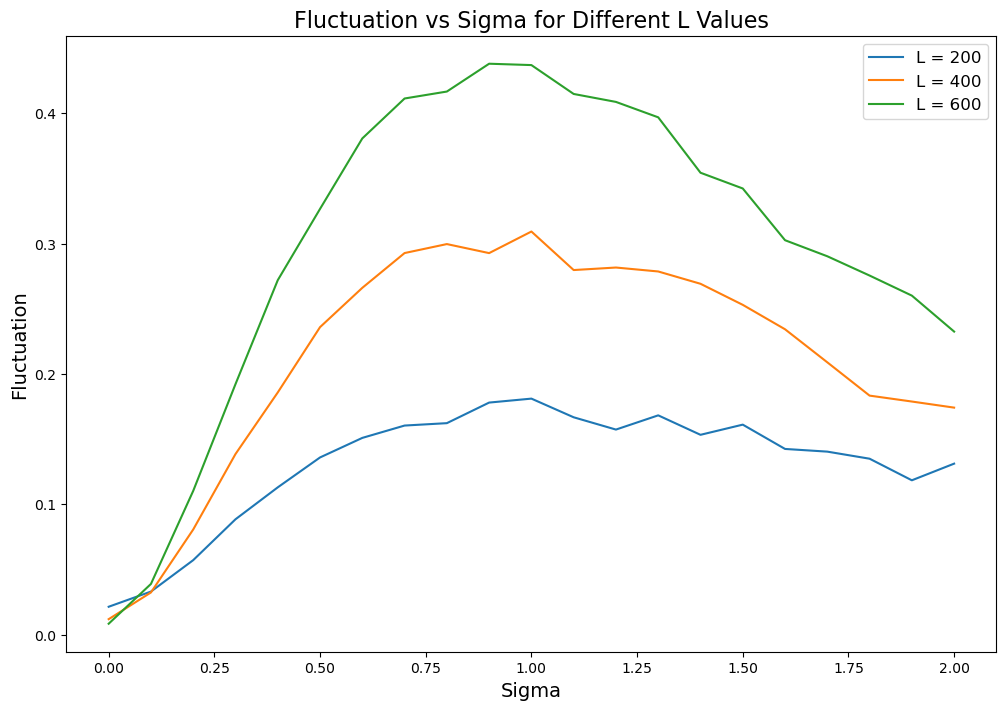

In [17]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L_values = [200, 400, 600]  # Different values of L
sigma_values = np.arange(0, 2.1, 0.1)  # Sigma range from 0 to 2 with interval 0.25

# Prepare the plot
plt.figure(figsize=(12, 8))

# Loop over different L values
for L in L_values:
    t = 0.75  # hopping amplitude
    dt = -0.25
    fluctuations = []  # List to store fluctuation values for each sigma
    
    for sigma in sigma_values:
        # Initialize Hamiltonian (SHH) based on the current sigma value
        w = t - dt
        v = t + dt
        SHH = np.zeros((L, L), dtype=complex)
        
        for i in range(L - 1):
            v_i = v * ((i + 1) / (L - 1)) ** sigma
            w_i = w * ((i + 1) / (L - 1)) ** sigma
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            if i % 2 != 0:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = w_i
        
        # Compute eigenvalues and eigenvectors of SHH
        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
        
        # Initialize matrices GA, GB for time evolution
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1

        G = GA - GB
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                X[i + 1, i + 1] = X[i, i]

        mid_matrix = G @ X

        # Compute initial state |psi>
        psi = initial_matrix(L)

        # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
        time_range = np.linspace(0, L / 3, L)  # Time values
        f_values = []
        for t_val in time_range:
            psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
            bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
            f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
            f_values.append(f_t.real)  # Take the real part of f(t)
        
        # Calculate fluctuation (variance of f_values)
        fluctuation = np.var(f_values)
        fluctuations.append(fluctuation)
    
    # Plot fluctuation vs sigma for the current L
    plt.plot(sigma_values, fluctuations, label=f'L = {L}')

# Finalize the plot
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Fluctuation', fontsize=14)
plt.title('Fluctuation vs Sigma for Different L Values', fontsize=16)
#plt.grid(True)
plt.legend(fontsize=12)
plt.show()
